# The Wave Equation

In [ ]:
#| default_exp the_wave_equation

## Objectives

- Give a formal definition of acoustic propagation.
- Define the (Linear) Wave Equation
- Introduce numerical methods to solve it.

## The wave equation in a fluid

- Longitudinal waves due to pressure variations
- The perturbation that propagates in the medium is the wave (mass does not propagate)

<table><tr>
<td> <img src="./images/7.wave-equation/1.Longitudinal Waves.gif" alt="p-wave" style="width: 550px;"/>
</tr></table>  

_Figure from Dan Russel [Acoustics and Vibration Animations](https://www.acs.psu.edu/drussell/demos.html)_

- To describe the phenoma we consider the medium as composed of a number of elementary volumes, called particles
- Each volume is characterised by a mass, kinetic and potential energy
- We define a reference system $x, y, z$
- Each particle has sides aligned with our reference system
- We call $\textbf{u}$ the position variation of the particle with respect to its equilibrium position (called displacement)
  - Note that the particle does not move but its side can stretch or compress w.r.t to its equilibrium position.
- We call $\textbf{v}=\frac{\partial \textbf{u}}{\partial t}$ the particle velocity (derivative of the displacement w.r.t to time).  
  - Note that it is a partial derivative because we have an infinite number of particles and its displacement might depend on its absolute position in space and on time.
  - E.g., the black particle has, for a given time, a displacement that is different from the displacement of other particles (the displacement depends from x, y, z, and t)

<table><tr>
<td> <img src="./images/2.ocean-acoustics/P-wave_animation.gif" alt="p-wave" style="width: 550px;"/>
</tr></table>  



Let's define some key equations

### Conservation of mass
$$
\frac{\partial \rho}{\partial t} = -\nabla \cdot \rho \textbf{v}
$$

where $\rho$ is the density, and $\textbf{v}$ is the velocity.

Eq. of conservation of mass (for a unit volume).


$\nabla \cdot \textbf{v}$ is the divergence of the velocity and can be interpreted as (the negative of) the fractional rate of change of the density of the fluid element.

Given a vector $\textbf{v}=[v_x, v_y, v_z]^T$, its divergence is a scalar defined as:
$$
\nabla \cdot \textbf{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} + \frac{\partial v_z}{\partial z}
$$

It tells us, locally, how much the vectors of the vector field $\textbf{v}$ are [converging or diverging](https://mathinsight.org/divergence_idea).

<table><tr>
<td> <img src="./images/7.wave-equation/2.vector_field_explosion.png" alt="2.vector_field_explosion" style="width: 300px;"/>
<td> <img src="./images/7.wave-equation/3.vector_field_implosion.png" alt="3.vector_field_implosion" style="width: 300px;"/>
</tr></table>  

Positive divergence (Left); Negative divergence (Right).

- The equation is telling us that the variation of mass depends on how much the velocity converges or diverges: converging vectors, increasing mass and vice versa
- The equation of the conservation of mass is normalised w.r.t to volume $V$ ($m = \rho V$)
    - Each particle has volume $dV = dx dy dz$ but we are considering normalised volume.


### Newton's 2nd law (Euler's equation)

$$
\frac{\partial \textbf{v}}{\partial t} + \textbf{v} \cdot \nabla \textbf{v} = -\frac{1}{\rho}\nabla p (\rho)
$$

- $F = ma$

- Normalised with respect to the volume (we divide by $\frac{1}{\rho}$)
- $\frac{\partial \textbf{v}}{\partial t}$ is the acceleration
- $\nabla p$ is the force
- $\textbf{v} \cdot \nabla \textbf{v}$ is quadratic in the velocity 
  - $\nabla \textbf{v}$ is the Jacobian Matrix ($\textbf{v}$ is a vector)
  - $\textbf{v} \cdot \nabla \textbf{v}$ is a: vector x matrix $ \rightarrow $ vector


### Adiabatic state equation

- We also need a thermodynamic state equation to relate pressure with density
- The adiabatic process is a thermodynamic process in which there is no heat transfer from in or out of the system 

- We need it in a form that is generic (Taylor expansion - could be Ideal gas law)

$$
p = p_0 + \rho' \Big [\frac{\partial p}{\partial \rho} \Big]_{S} + \frac{1}{2}(\rho')^2\Big [\frac{\partial^2 p}{\partial \rho^2} \Big]_{S}  + ...
$$

We finally call:

$$
c^2 = \Big [ \frac{\partial p}{\partial \rho} \Big ] _S
$$

- pressure variation with respect to density, in the adiabatic state equation
- $c$ will correspond to the sound speed (we will see this later)

## Small perturbations, linear approximation

- We now introduce a linear approximation, considering small enough perturbation so that we can truncate to the first order all perturbations in the medium

We can then define *pressure* as:
$$
p = p_0 + p'
$$

where $p_0$ is the equilibrium pressure, $p'$ is the pressure variation.


We can then define *density* as:
$$
\rho = \rho_0 + \rho'
$$

where $\rho_0$ is the equilibrium density, $\rho'$ is the density variation.

We also assume that:

$$
|\textbf{v}(p', \rho')| << c
$$

i.e., the particle velocity (which is function of $(p', \rho')$, because at equilibrium the velocity would be zero) is much less than $c = \sqrt{\Big [ \frac{\partial p}{\partial \rho} \Big ] _S}$

Under these assumptions, our equations can be simplified as:

Conservation of mass
$$
\frac{\partial \rho'}{\partial t} = -\rho_o\nabla\cdot \textbf{v} \;\;\;\;\;\; (1)
$$

Newton's 2nd Law:
$$
\frac{\partial \textbf{v}}{\partial t} = -\frac{1}{\rho_0}\nabla p'(\rho)  \;\;\;\;\;\; (2)
$$

and the relation between pressure variation and velocity variation becomes:

$$
p' = \rho' c^2 \;\;\Rightarrow\;\; c^2 =\frac{p'}{\rho'}
$$

i.e., $c^2$ is the ratio between pressure variation and velocity variation. This comes from the Taylor expansion of the eq. of state.

With a slight abuse of notation, in the rest of the calculations we will drop the apostrophe and use:

$$
p = p'\;\; \rho = \rho'
$$

to represent our perturbations.


The linear differential wave equation can be obtained with respect to pressure and with respect to velocity.

### Linear Wave Equation with respect to Pressure

We take the time derivative of the conservation of mass (1):

$$
\frac{\partial^2}{\partial t^2}\rho = -\rho_o \frac{\partial}{\partial t} \nabla\cdot \textbf{v}
$$

and the divergence of Netwton's second law (2):

$$
\nabla \cdot \frac{\partial \textbf{v}}{\partial t} = - \frac{1}{\rho_0}\nabla \cdot \nabla p
$$

where $p$ and $\rho$ are the variations w.r.t to the respective equilibrium quantities.

Let's now assume that we can replace time derivative with the divergence as (true under specific continuity assumptions):

$$
\nabla \cdot \frac{\partial \textbf{v}}{\partial t} = \frac{\partial}{\partial t}\nabla \cdot \textbf{v}
$$

This means that the first term in the second equation is equal to the second term of the first equation.

Moreover, we know, from the relation between pressure variation and velocity variation, that:
$$
\rho = \frac{1}{c^2}p
$$

and assume that $c$ does not vary with time.

We can hence write:

$$
\frac{1}{c^2} \frac{\partial^2}{\partial t^2}p = -\rho_o \Big (-\frac{1}{\rho_0} \nabla \cdot \nabla p \Big ) \Rightarrow 
\frac{1}{c^2} \frac{\partial^2}{\partial t^2}p = \nabla \cdot \nabla p
$$


Since 

$$
\nabla \cdot \nabla p = \nabla^2 p = \Delta p
$$

Which is the Laplacian of $p$:

$$
\Delta p = \frac{\partial^2}{\partial x^2}p + \frac{\partial^2}{\partial y^2}p + \frac{\partial^2}{\partial z^2}p
$$

The Laplacian of $p$ is the sum of the second order space derivatives of $p$.

So our equation:
$$
\frac{1}{c^2} \frac{\partial^2}{\partial t^2}p = \nabla \cdot \nabla p = \frac{\partial^2}{\partial x^2}p + \frac{\partial^2}{\partial y^2}p + \frac{\partial^2}{\partial z^2}p
$$

or 

$$
\frac{\partial^2}{\partial x^2}p + \frac{\partial^2}{\partial y^2}p + \frac{\partial^2}{\partial z^2}p -\frac{1}{c^2}\frac{\partial^2}{\partial t^2}p = 0
$$


which is the linear wave equation with respect to pressure.

More in general, 
_all linear wave equations establish the linear relation between second order space derivative of a field (in our case, pressure) with the second order time derivative_

#### Linear Wave Equation in a Fluid with respect to Pressure (Final form)

And we can more generaly write the Linear Wave Equation in a Fluid w.r.t to pressure as:

$$
\rho\nabla\cdot \Big (\frac{1}{\rho}\nabla p \Big ) - \frac{1}{c^2}\frac{\partial^2 p}{\partial t^2} = 0 \;\;\;\; (*)
$$

- Note that it is a scalar equation.
- w.r.t to our previous expression $\rho$ is also assumed to be changing. In practise we always assume it constant.

### Linear Wave Equation with respect to Velocity: 

We take the gradient of the conservation of mass (1):

$$
\nabla \frac{\partial}{\partial t}\rho = -\rho_0\nabla (\nabla \cdot \textbf{v})
$$

and the time derivative of Netwton's second law (2):

$$
\frac{\partial^2}{\partial t^2}\textbf{v} = -\frac{1}{\rho_0} \frac{\partial}{\partial t}\nabla p\;\;\;\;\;(3)
$$

we then use the relation between pressure variation and velocity variation:
$$
\rho = \frac{1}{c^2}p
$$

We can again swap the differential operators and write:


$$
\nabla\frac{\partial \rho}{\partial t} =  \frac{1}{c^2} \nabla \frac{\partial}{\partial t}{\rho} = \frac{1}{c^2} \frac{\partial}{\partial t}\nabla p
$$

And from the first equation:
$$
\frac{1}{c^2} \frac{\partial}{\partial t}\nabla p = -\rho_0\nabla (\nabla \cdot \textbf{v}) \;\;\;\;\;(4)
$$


We note that $\frac{\partial}{\partial t}{p}$ is defined in eq. (3) and in (4)


And hence from the second equation we can write:

$$
\frac{\partial^2}{\partial t^2}\textbf{v} = -\frac{1}{\rho_0} \Big( -c^2 \rho_0\nabla (\nabla \cdot \textbf{v}) \Big ) =   c^2 \nabla (\nabla \cdot \textbf{v}) 
$$

Note that this is a vector equation:
$$
\frac{\partial^2}{\partial t^2}\textbf{v} 
$$

is a vector of the second order time derivative of the components of the velocity, and $ \nabla (\nabla \cdot \textbf{v}) $ gives the second order space derivative  w.r.t $(x, y, z)$.

#### Linear Wave Equation in a Fluid with respect to Velocity (Final form)

We can then write:


$$
\nabla (\nabla \cdot \textbf{v}) = \frac{1}{c^2} \frac{\partial^2}{\partial t^2}\textbf{v}
$$

which is again in the form of a wave equation (relation between second order spatial derivative and second order time derivative).


That we can also re-write as:

$$
\frac{1}{\rho}\nabla \Big ( \rho c^2 \nabla \cdot \textbf{v} \Big ) - \frac{\partial^2 \textbf{v}}{\partial t^2} = 0 \;\; (*)
$$

assuming $\rho$ non constant.


The wave equations are dynamic equations, that includes both a dependency on time and on space, and its solution will be a function:

$$p(x, y, z, t)$$

or

$$\textbf{v} = [v_x(x, y, z, t); v_y(x, y, z, t); v_z(x, y, z, t)]$$

## Wave Potential


- Solving the wave equation we have the velocity (a vector) and the particle displacement (a vector)
- Solving vector equations is not trivial

- We are intested in the velocity field, a vector-valued function of space and time, but it would be simpler to work with scalar functions of space


**Hypothesis:**
- Is it possible that the velocity field, a vector-valued function is the gradient of a scalar field?
- What conditions on the velocity should we have to make it possible for the velocity to be the gradient of a scalar field?

Let's suppose that a scalar field $\phi$ exists.

If $v$ is the gradient of the scalar field $\phi$, then:
$$
\textbf{v} = \nabla\phi
$$

We can now replace this equation in our vector-valued wave equation to obtain (assuming constant density):

$$
\nabla \Big ( c^2 \nabla^2 \phi  - \frac{\partial^2  \phi}{\partial t^2} \Big ) = 0
$$

- This is equal to zero if:

$$
c^2 \nabla^2 \phi  - \frac{\partial^2  \phi}{\partial t^2} = 0 \;\;\Rightarrow\;\; \nabla^2 \phi  - \frac{1}{c^2}\frac{\partial^2  \phi}{\partial t^2} = 0\;\;\;\;\text{Wave potential for particle velocity}
$$


- Note that the term within the paranthesis is a scalar wave equation! (the equation is mathematically similar to the pressure wave equation).
- We call $\phi$ the _wave potential for particle velocity_


- More in general we say that: _a scalar field, whose gradient is a vector field, is the potential of the vector field_
    - In our case $\phi$ is the potential of $\textbf{v}$
    
    
- What this means is that: for $\textbf{v} = \nabla\phi$ (i.e., there exists a velocity potential), $\phi$, the potential must satisfy the wave equation.
  - In other words, if I find a scalar function that satisfies the wave equation, this is a velocity potential.
 

We can do similar computations for the particle displacement, and obtain a scalar field $\psi$ for the particle displacement: 
  
$$
\textbf{u} = \nabla\psi
$$

And the potential for the displacement must satisfy the same wave equation:

$$
\nabla^2 \psi  - \frac{1}{c^2}\frac{\partial^2  \psi}{\partial t^2} = 0 \;\;\;\;\text{Wave potential for particle displacement}
$$  

Finally, (after some additional passages) we can also say that the pressure:

$$
p = - K\nabla^2\psi
$$

(pressure is equal to the Laplacian of the wave potential for the particle displacement)

Where $K=\rho c^2$

Since $ \nabla^2\psi = \frac{1}{c^2}\frac{\partial^2\psi}{\partial t^2}$:

$$
p = -\rho\frac{\partial^2\psi}{\partial t^2}
$$

where $\rho$ is the equilibrium density.

## The Helmholtz Equation

- The wave potential equations for particle velocity and displacement are partial differential equation
- To solve it we can apply the Laplace Transform and then we anti-transform to have the time domain solution


- In our equations we have _four_ differential operators (we are taking the derivative w.r.t. $x, y, z, t$)
- Applying the Laplace Transform only applies to the time dependency which becomes algebric (i.e., no derivatives w.r.t. to time), however we will still have the derivatives w.r.t. space

- Instead of using the Laplace Transform we use the Fourier Transform of the wave potential equation

- Roughly speaking the Laplace Transform and the Fourier Transform are "the same", where we restrict $s=j\omega$, and $\omega=(-\inf, +\inf)$.
  - Laplace Transform captures transient effects
  - Fourier Transform captures stationary effects

Let's apply the Fourier Transform to the scalar wave equation

$$
\nabla^2 \psi  - \frac{1}{c^2}\frac{\partial^2  \psi}{\partial t^2} = 0 \;\;\;\;\text{Wave potential for particle displacement}
$$  

- $\nabla^2 \psi $ depends on space and does not depend on time (Laplace operator does not apply to the different operator, however it does apply to $\psi$)
- $\frac{1}{c^2}\frac{\partial^2  \psi}{\partial t^2}$ depends on the second order time derivative

Since: 

$$\ddot{y(t)} \rightarrow \mathcal{L}|_{s=j\omega} \rightarrow  (j\omega)^2Y(j\omega) = -\omega^2Y(j\omega)$$

We obtain:

$$
[\nabla^2 + k^2(\textbf{r})]\psi(\textbf{r}, j\omega)=0 \;\;\;\;\text{Helmholtz equation}
$$

where 
- $\psi(\textbf{r}, \omega)$ is the Fourier Transform of $\psi$, which depends on a point in space $\textbf{r}$ and on $\omega$ (we could have written $\psi(j\omega$))
- $k(\textbf{r}) = \frac{\omega}{c(\textbf{r})}$, which is the wavenumber (see wave equation).
- Note that $k(\textbf{r})$ is a function of $\textbf{r}$ because $c$ is a function of $\textbf{r}$. The sound velocity is a function of space (and locally constant) because the equation holds everywhere in space
- Note also that the Radian frequency $\omega$ is now a parameter of the equation

We have simplified the equation which is now differential only w.r.t to space

When we study the wave equation and we restrict ourselves to the Helmholtz equation, it is equivalent to assume that the wave equation has an harmonic solution:

$$
\Phi = \phi e^{-i\omega t}
$$
 - we assume a stationary wave of frequency $\omega$

and in fact, plugging this harmonic solution into the wave equation, we get a new wave equation:

$$
\nabla^2\phi + k^2\phi=0
$$


Comments

- if $r=(x,y,z)$ we have a Cartesian reference system
- Using Polar or Cylindrical coordinates the differential operators are sligthly different, we need to do the coordinate transformation and use the Jacobian of the coordinate change (e.g., the Laplacian has a form that takes into account the Jacobian of the transformation).

## Solutions to the Helmholtz Equation

- Analytical solutions are available only in special cases: isotropy, omnidirection source: solutions are spherical waves

- Depending on the assumptions made on the medium (isotropy, anisotropy, and along which directions, etc), on the frequency and on the boundary conditions, different numerical solution methods can be defined
   - We have partial differential equations so we have boundary conditions

- These numerical methods are the basis of _acoustic models_, as simulators of acoustic propagation are called
   - This is different terminology from what we typically use (the model is not the equation)

Typical assumptions on the medium:

- Range dependent medium: $c(x,y,z) = c(r, z)$
- Range independent medium: $c(x,y,z) = c(z) $

### Ray-Theory Solution

When we restrict to the Helmholtz equation, it is equivalent to assume that the wave equation has an harmonic solution:

$$
\Phi = \phi e^{-i\omega t}
$$

and if we plug this in in the wave equation we obtain:

$$
\nabla^2\phi + k^2\phi = 0
$$

equation in $\phi$.

In this case $\phi$ can be separated into two components:

$$
\phi = F(x,y,z)e^{i\phi(x,y,z)}
$$

where:
- $F(x,y,z)$ is the Amplitude function (real)
- $\phi(x,y,z)$ is the Phase function (real)

Note:
- This is never an exact solution of the Helmholtz equation
- It is exact only when $\omega \rightarrow \inf$
- It is an approximate solution with an error that goes to zero as $\omega \rightarrow \inf$

This means that it becomes a better approximation as the frequency increases
- The Ray-Theory Solution is a _High Frequency Approximation_

#### When is a frequency high?

We talk about _high frequency_ when spatial variations in the medium (variations speed of sound) or properties of the boundaries (sea floor, surface) have dimentions much larger than the acoustic wavelength.

- What is the acoustic wavelength? 
  - $c \approx 1500$m/s
  - Wavelength $\lambda = \frac{c}{f}$
  - E.g. at 100 Hz: $\lambda = 1500/100=15m$
  
Example: Seasonal thermocline in Pianosa

<table><tr>
<td> <img src="./images/5.environmental-variability/1.temperature-pianosa.png" alt="temperature-pianosa" style="height: 300px;"/></td>
</tr></table> 

- Seasonal thermocline in Pianosa started at about 20m and ended at 30m
- This is a 15m range
- The variation of the properties of the medium is comparable to (in this case less than) the typical wavelength of a 100Hz signal. 
- 100Hz is a low frequency signal in this environment
- Ray theory would not be suitable to model acoustic propagation
- If instead we use a 100 kHz signal: $\lambda = 1500/100000=0.015m = 15mm$
- The spatial variations of the medium are now much larger then a $\lambda=15mm$ wavelength
- 100 kHz is high frequency in this environment

- The ray model is easy to understand, easy and fast to compute (ordinary differential equations), easy to visualise and can handle any medium anisotropy (this is why we had $F(x,y,z)$ and $\phi(x,y,z)$ as a function of $(x,y,z)$)


- We want to use the ray model when we can (and this depends on the environment!).
   - Consider what happens in very shallow waters (e.g., 5 meters)

### Normal Modes and Fast Field Solution

- Method that produces an exact solution with arbitrary precision
- Applies to range dependent and independent environments
- Applies to any frequency

The function $\phi$ is given by two functions, each dependent on only one variable (depth and range)
$$
\phi = F(z)G(r)
$$

where
- F is the depth function (complex: it has amplitude and phase)
- G is the range function (complex)

- Note that we are not considering all three dimensions like we did for the ray model
- Solutions for full unisotropy is too complex to calculate

The **depth function** (which is then multiplied by the range function) is the series expansion of the so called normal modes, which is a weighted sum of eigenfunctions

<table><tr>
<td> <img src="./images/7.wave-equation/4.normal-modes.png" alt="4.normal-modes" style="height: 300px;"/></td>
</tr></table> 

_Figure: From Computational Ocean Acoustics_

In the Figure above:
- Depth 0: sea surface
- Depth 100m: sea bottom


- Similarly to a vibrant string, there are infinite but **countable** number of ways in which the string can vibrate: these are the modes
- Summing up these modes we can obtain all the possible movements of the string 
- Summing up these modes we can obtain all the possible combinations of the acoustic field as a function of depth (we will be also multiplying this function by the range function)


- If the sum of the modes gets to infinity (and hence we know how to analytically calculate the weights for each function), the solution is exact and can be calculated analytically
- Since we do not know how to calculate the weights analytically we need to use numerical methods
- Summing up an infinite number of functions is also not ideal so we truncate it
- The more normal modes we use the better the solution
- Note that since we have an infinite series, the weights must go to zero (or the serie cannot converge)
   - We trucate when the weights decrease is under a desired threshold (typically trial and error)


- The normal modes and fast field solution works at any frequency
   - The higher the frequency the higher the number of modes that we need to use

The **range function**:
- The solution for the range function is calculated as solution of a Bessel equation via _Hankel functions_


- The Bessel partial differential equation is the Helmholtz equation in cylindrical coordinates
  - When the medium changes only as a function of range and depth we are in cylindrical coordinates
  - When calculating the Laplacian operator in cylindical coordinates we have to consider the Jacobian of the coordinate transformation and we obtain a new equation: The Bessel equation
  - The Bessel equation can be solved more easily using Hankel functions
  

- Very accurate, long to compute
  - We typically only solve it for range independent environments
  - Time to compute depends on the number of normal modes
  - Easily an order of magnitude longer than the ray method, even for reduced number of modes (e.g. 30)
  
  - Works for every frequency, however:
      - We typically use it for low frequency when we can use lower number of modes
      - At high frequency it is more efficient to use the ray method (the result would be the same but with need higher number of modes, and rays are more efficient)
   
- Note that the range function $G(r)$ is also needed for range-independent environments

### Parabolic equation

- We still have the product of two functions:

$$
\phi = F(r, \theta, z)G(r)
$$

where:

- $F(r, \theta, z)$ is the solution of the so-called _parabolic equation_ (complex)
- $G$: range function (complex)


- We use cylindrical coordinates
- Medium can be fully anisotrope


- Well suited and valid for low-frequency, small grazing angle propagation (e.g., shallow water) and range-dependent environments


- Grazing angle (ITA: angolo di radenza): The 90-degree complement to angle of incidence is called the grazing angle or glancing angle. 

<table><tr>
<td> <img src="./images/7.wave-equation/5.grazing_angle-2.png" alt="5.grazing_angle" style="height: 300px;"/></td>
</tr></table> 

- This method is useful when the wavefront interacts with the seabed with small grazing angles 

## Water-Seabed Interface

- What happens at the boundary between the water and the seabed
- Seabed is typically non fluid but we approximate it as a fluid (for now)
- We will look at what happens to acoustic propagation at a fluid-fluid interface (water-seabed interface)

- We consider planar wave and we can draw the direction of propagation of the wave as in the picture below (the arrow is perpendicular to the wavefront of the planar wave)
- Note that the more we move away from the source the more wavefronts can be approximated by planar wavefronts (assuming isotropy)
- We assume a smooth interface between the two fluids
- Intrinsic attenuation in both fluids is negligible

<table><tr>
<td> <img src="./images/7.wave-equation/6.water-seabed-boundary.png" alt="6.water-seabed-boundary" style="height: 300px;"/></td>
</tr></table> 

- Fluid 1: density $\rho_1$, speed of sound $c_1$
- Fluid 2: density $\rho_2$, speed of sound $c_2$

- Given an incident wave, it generates two wavefronts:
   - A reflected wave back into the water (fluid 1)
   - A transmitted wave into the second fluid
   
   As per Huygens’ Principle: Every point on a wavefront is itself the source of spherical wavelets, and the secondary wavelets emanating from different points mutually interfere. The sum of these spherical wavelets forms a new wavefront.
   
   Since the two fluids have different velocities, the wavefronts have a different grazing angle.
   
<table><tr>
<td> <img src="./images/7.wave-equation/7.huygens-11.png" alt="7.huygens-1" style="height: 200px;"/></td>
<td> <img src="./images/7.wave-equation/7.huygens-22.png" alt="7.huygens-reflection" style="height: 200px;"/></td>
<td> <img src="./images/7.wave-equation/7.huygens-3.png" alt="7.huygens-refraction" style="height: 200px;"/></td>    
</tr></table> 
   
   
   See also Computational Ocean Acoustics, Chapter Fundamentals of Ocean Acoustics, Section 1.6 Bottom Loss. And [How sound moves](https://dosits.org/science/advanced-topics/how-does-sound-move-wave-propagation-and-huygens-principle/) or [Society of Exploration Geophysicists | Snell's_law](https://wiki.seg.org/wiki/Snell%27s_law)  

### Reflection at a fluid-fluid interface

**Reflection coefficient R**
   
  - For now, it is useful for us to define a quantity that relates the amplitude of the incident and of the reflected wave. 
  
  - We call this quantity **Reflection coefficient R**: ratio of the RMS amplitude of the reflected wave and of the incident wave (must be $\le$ 1).
   
   $\theta_2$ depends on the Snell's Law (we expected this)
   
   $$
   \frac{\cos\theta}{c} \Rightarrow  k_2\cos\theta_2 = k_1\cos\theta_1
   $$
   
   where:
   
   - $$k_1 = \frac{\omega}{c_1}$$ 
   - $$k_2 = \frac{\omega}{c_2}$$ 
   
   are the wavenumbers in the two media.
   Note that $\omega$ is the same in both media.
   
   From the equation above we understand that when $c_2 > c_1$, the transmitted grazing angle is smaller than incident grazing angle ($\theta_2 < \theta_1$)
   
   But also the reflection coefficient depends on the Snell's Law:
   
   - The reflection coefficient assumes the following form: 
   
   $$
   R = \frac{\rho_2c_2/\sin\theta_2 - \rho_1c_1/\sin\theta_1}{\rho_2c_2/\sin\theta_2 + \rho_1c_1/\sin\theta_1} = \frac{Z_2 - Z_1}{Z_2 + Z_1}
   $$
   
   depends on:
   - the grazing angles
   - the sound speeds
   - the density of the two media
   
   Comments:
   - We defined $\rho c$ as the acoustic impedence. In the reflection coefficient the acoustic impendence is weighted by the sine of the grazing angles.
   
   - This means that $R$ depends on $\theta$ and varies only based on the incident $\theta_1$ (we can always calculate $\theta_2$ based on the Snell's Law).
         
         
   We call:
   $$
   R = \frac{Z_2 - Z_1}{Z_2 + Z_1}\;\;\;\;\textbf{Rayleigh Reflection coefficient}
   $$   

### Critical Angle

With the Rayleigh Reflection Coefficient, and specifically when $c_2>c_1$ (speed in the seabed higher than in water) it might happen that exists an angle $\theta_1$ where (remember that $\omega_1=\omega_2$):

$$
\cos\theta_1 = \frac{k_2}{k_1}=\frac{c_1}{c_2} 
$$

- $\frac{c_1}{c_2} < 1$ so the angle $\theta_1$ is well defined

Since,

 $$k_2\cos\theta_2 = k_1\cos\theta_1$$
 
 This means that 
   
$$\cos\theta_2=1 \Rightarrow \theta_2 = 0 \Rightarrow R=1$$

This implies exits an incident grazing angle for which the transmitted grazing angle is parallel to the interface between the two fluids. We call this angle **critical grazing angle**.

$$
\theta_c = \arccos\frac{c_1}{c_2}
$$

As $\theta_1$ decreases, and hence as $\cos\theta_1$ increases, $\cos\theta_2$ becomes larger than 1 (becomes imaginary and has a phase - see Figure below, dashed line - not too important for us )$\Rightarrow$ there is no transmission in the second fluid (total reflection).

$$
\theta > \theta_c \Rightarrow |R| < 1
$$


$$
\theta \le \theta_c \Rightarrow |R| = 1
$$

- When $\theta \le \theta_c$ acoustic intensity is not lost due to the reflection.
- When $\theta > \theta_c$ acoustic intensity going back in the water is less.

<table><tr>
<td> <img src="./images/7.wave-equation/8.reflection-coeffs-1.png" alt="8.reflection-coeffs" style="height: 300px;"/></td>
</tr>
</table> 

_Figure: Reflection coefficient as a function of grazing angle for a hard-bottom halfspace. Solid curve: Magnitude. Dashed curve: Phase (Adapted from Computational Ocean Acoustics, Fig. 2.10)_


- The curve is calculated assigning specific values to $c_1, \rho_1$ and $c_2, \rho_2$ to calculate the coefficient R.

- In the general case of lossy media ($c_i$ complex), the reflection coefficient is complex, and, consequently, there is both a loss and a phase shift associated with each reflection

## Intromission Angle

- Another special case of interest is when all energy is transmitted into the bottom, i.e., $|R| = 0$

- Total transmission occurs at an angle $\theta_0$ given by:

$$
\theta_I = \arctan \sqrt \frac{1-(c_2/c_1)^2}{[(\rho_2c_2)/(\rho_1c_1)]^2-1} \Rightarrow R=0
$$

- This angle is called the **intromission angle**
- Calculated from the Rayleigh Reflection Coefficient equation and from Snell's Law.

This occurs when the fraction under the square root >0.
This happens when:

- $c_2 < c_1$ with $\rho_2c_2 > \rho_1c_1 \rightarrow \rho_2 > \rho_1$. Corresponds to low-speed, high-density sediments (e.g., muddy bottoms)

- $c_2 > c_1$ with $\rho_2c_2 < \rho_1c_1$. Corresponds to high-speed, low-density sediment and never occurs in ocean acoustics.


<table><tr>
<td> <img src="./images/7.wave-equation/9.reflection-coeffs-21.png" alt="9.reflection-coeffs-21" style="height: 300px;"/></td>
</tr></table> 

_Figure: Reflection coefficient as a function of grazing angle for a soft-bottom halfspace. Solid curve: Magnitude. Dashed curve: Phase (Adapted from Computational Ocean Acoustics, Fig. 2.12)_


- Note that, grazing angle zero means that the planar wave is parallel to the halfspace and hence continue its propagation in the water (no transmission into the seabed, no reflection)

## Propagation in shallow water

- Let's see if the Reflection Coefficient is important
- Focus on shallow water propagation
- Summer Sound Speed Profile
- Source at 50m (in the thermocline)
- Use of a ray tracer to predict acoustic propagation


In [ ]:
from underwater_systems import ray_tracing
import matplotlib.pyplot as plt
import numpy as np

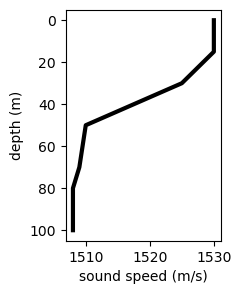

In [ ]:
# bottom limited sound channel
ssp = ray_tracing.SSP([0, 15, 30, 50, 70, 80, 100],
          [1530, 1530, 1525, 1510, 1509, 1508, 1508])


plt.figure(figsize=(2, 3))
ssp.plot()

In [ ]:
t0, tf, dt = 0, 4, 0.01
rt = ray_tracing.RayTracer(time=[t0, tf, dt], 
               source_depth=50, 
               min_range=0, 
               thetas=range(25, -25, -5), 
               ssp=ssp)

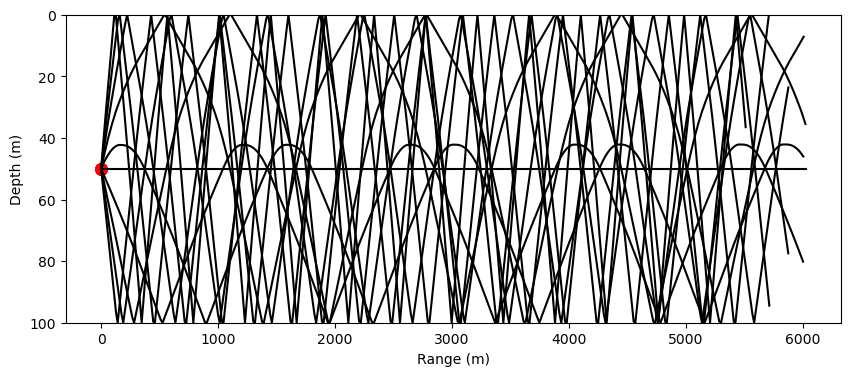

In [ ]:
plt.figure(figsize=(10, 4))
rt.run()

- All rays moving downwards reflect on the seabed 
- Each ray would have its own grazing angle
- Every time a ray hits the bottom, a part of the incident acoustic intensity carried by the ray comes back into the water

For example, a ray hitting the bottom at a 45deg, has a R=0.2 (see critical angle picture above)
 - wave with ampliture A, the first time hits the bottom reduces its intensity: 0.2\*A, the second time, 0.2\*0.2\*A, ... $0.2^n*A$
 - amplitude along the ray quickly decreases due to bottom reflections
 - these can have an impact that is higher than the intristric or geomatric attenuation

- Note that those rays with grazing angle less than the critical angle have $|R|=1$ do not have attenuation, they all come back into the water column.
- This means that in shallow water, where we always have bottom interactions, only those rays that bounce off the bottom with grazing angles less than the critical one, have no attenuation
  - Long range propagation only at subcritical angles (low grazing)

- Note that the axis in the above plot have different scales (1:60)
- This means that we have unavoidable interaction with the bottom
- The plot below better represents the scenario

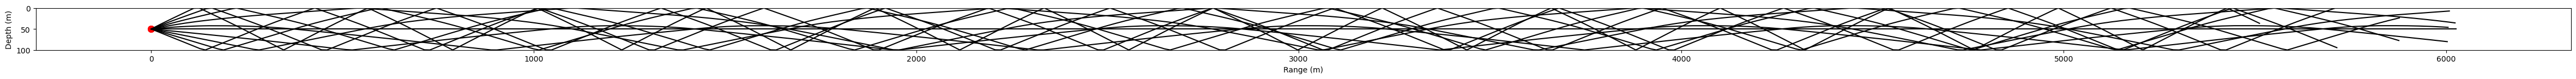

In [ ]:
plt.figure(figsize=(60, 1))
rt.run()

### More Realistic Seabeds

- We have assumed so far that the bottom is a fluid
- Of course..they are not.

### Waves in an elastic medium

- If the seabed is not fluid, it is elastic
- In an elastic medium we have both:
  - Longitudinal (or compressional) waves (Primary P waves) where each particle is deformed across the three dimentions (the same that propagates in a fluid).
  - Shear waves (Secondary S waves). Each particle can deform due to shear (each small volumes can rotately deform - twist). The movement of the particle due to a wave traveling in the x-axis, is a y-axis movement w.r.t to a x-axis propagation

<table><tr>
<td> <img src="./images/2.ocean-acoustics/P-wave_animation.gif" alt="P-wave_animation" style="height: 250px;"/></td>
<td> <img src="./images/2.ocean-acoustics/S-wave_animation.gif" alt="S-wave_animation" style="height: 250px;"/></td>
</tr>
</table> 

_Figure: Images from [University of Alicante](https://web.ua.es/en/urs/disclosure/seismic-wave-propagation.html)_


- The two waves propagate in the same medium but have different propagation velocities:

$$c_s \ll c_p$$



### Interface waves (surface waves)

Close to the interface between two media, and specifically between a fluid and an elastic medium, we have two more types of waves which are together called _Surface waves_,

- Surface waves can further distinguish into _Love waves_ and _Rayleigh waves_, in honor to the scientists who theoretically demonstrated its existence.

- They need to happen to satisfy the overall energy balance and to have continuity in the movement of the medium (displacement and velocity) - particles cannot detach.

<table><tr>
<td> <img src="./images/7.wave-equation/Love_animation.gif" alt="Love_animation" style="height: 250px;"/></td>
<td> <img src="./images/7.wave-equation/Rayleigh_animation.gif" alt="Rayleigh_animation" style="height: 250px;"/></td></tr>
</table> 

_Figure: Images from [University of Alicante](https://web.ua.es/en/urs/disclosure/seismic-wave-propagation.html)_

- **Love waves** moves along the y-axis, and their amplitude decreases as we move deeper into the medium (the farther away we are from the interface)
- **Rayleigh waves** produce a circular motion of the particles. Amplitude decreases as we move away from the surface
- Propagation velocity close to that of S waves

### Headwaves

- Head waves moves ahead the other waves
- Moves on the interface between the two mediums
- Longitudinal movement, but with a propagation speed of the second medium (when the speed of propagation of the Longitudinal waves is higher than the one of the first medium)

<table><tr>
<td> <img src="./videos/Head_waves_1080p.mp4" alt="Head_waves_1080p" style="height: 400px;"/></td>
</tr>
</table> 

_Figure: Image from [University of Utah](https://home.chpc.utah.edu/~thorne/animations.html)_


## Reflection at a Fluid/Solid interface

Assumptions:
- Planar wave
- Smooth interface
- Media attenuation negligible

A _Solid medium_ is characterised by two waves:
- Transmitted Primary Wave (grazing angle $\theta_P$)
- Transmitted Seconday Wave (grazing angle $\theta_S$)

- Solid has a density $\rho_2$ and two propagation speeds ($c_P, c_S$)

<table><tr>
<td> <img src="./images/7.wave-equation/10.fluid-solid-1.png" alt="10.fluid-solid" style="height: 400px;"/></td>
</tr>   
</table> 

We can define the Rayleight Reflection Coefficient:

$$
R = \frac{Z_{tot}-Z_1}{Z_{tot}+Z_1}
$$

where $Z_{tot}$ is the total acoustic impendence and is defined as:

$$
Z_{tot} = Z_P\cos^2(2\theta_P)+Z_S\cos^2(2\theta_S)
$$

it is the weighted sum of the two impedence $Z_P$ (acoustic impendence of the P wave), and of $Z_S$ (acoustic impendence of the S wave)

Remember that 
- the acoustic impedence is $Z=\rho c$
- sound is due the primary wave (so the sound speed is $c_P$)

Snell's Law also holds for each one of the two waves:

$$
k_1\cos\theta_1 = k_P\cos\theta_P = k_S\cos\theta_S
$$

This makes it possible to calculate $\theta_P$ and $\theta_S$ and hence to calculate the coefficient $R$

- $k$s are the wavenumbers for a planar wave with frequency $\omega$:
  - $k_1 = \omega/c_1$
  - $k_P = \omega/c_P$
  - $k_S = \omega/c_S$  
  
Since $c_S \ll c_P$, then $\theta_P < \theta_S$:
- if $c_S < c_1$, the S wave has a grazing angle larger than the incident grazing angle (see figure above)
- if $c_S > c_1$, the S wave grazing angle would be less than the incident grazing angle (and the 



## Hard vs Soft Bottoms

- Classify the rigidity of the seabed
- Seabed forms through two geological processes: sedimentation and compaction

- P and S wave velocities directly relate to the rigidity of the material
   - We can express the velocities as a function of the Lamé parameters or of the Young modulus

### Sedimentation

- Accumulation of materials at the water-seabed interface (e.g. river outflows)
- Pressure of layered sediments accumulated with time

We distinguish:
- **Unconsolidated sediments**: material that is water saturated (e.g., sand, mud) with high porosity where the bond between grains is fragile.
  - Divided in three main classes (based only on their grain size): sand, silt, clay
   - I.e., average diameter of a gain of sand > average diameter of a gain of clay 
   - The difference between classes is only due to this (e.g., not due to chemical difference, etc)



- **Consolidated sediments**: as pressure grows due to stratification over the unconsolitated sediment pushes out the water and the sediment grains glue up (compaction).
  - Compaction transforms unconsolidated sediment to consolidated: rocks 
  - Consolidated sediments have very low porosity
  - Takes a very long time to happen
  - Examples: limestone, sandstone (they retain in the name the unconsolidated sediment from which they originated
  
As we move down in the seabed we encounter a layer of **Rocks** due to results of geological/geophyical processes originated by the Earth interior and not due to compaction.
  - Example: basalts are due to this process  
  
  
_And possible mixed situations_  

### Geoacoustic Properties

The table below provides some typical values for **unconsolidated** sediments (going from softer to harder sediments):

| $\text{Sediment Type}$ | $M_z(\phi)$ | $\text{Porosity (%)}$ | $\rho_2\;\;(g/cm^3)$ | $c_2\;\;(m/s)$| $\alpha_2\;\;(dB/\lambda)$ | $c_{s,2}\;\;(m/s)$ |
|-|-|-|-|-|-|-|
|$\text{Clay}$           | $9$ | $80$ | $1.2$ | $1470$ | $0.08$ | $-$ |
|$\text{Silty clay}$     | $8$ | $75$ | $1.3$ | $1485$ | $0.10$ | $-$ |
|$\text{Clayey silt}$    | $7$ | $70$ | $1.5$ | $1515$ | $0.15$ | $125$ |
|$\text{Sand-silt-clay}$ | $6$ | $65$ | $1.6$ | $1560$ | $0.20$ | $290$ |
|$\text{Sand-silt}$      | $5$ | $60$ | $1.7$ | $1605$ | $1.00$ | $340$ |
|$\text{Silty-sand}$     | $4$ | $55$ | $1.8$ | $1650$ | $1.10$ | $390$ |
|$\text{Very fine sand}$ | $3$ | $50$ | $1.9$ | $1680$ | $1.00$ | $410$ |
|$\text{Fine sand}$      | $2$ | $45$ | $1.95$ | $1725$ | $0.80$ | $430$ |
|$\text{Coarse sand}$    | $1$ | $40$ | $2.0$ | $1800$ | $0.90$ | $470$ |


- $M_z(\phi)$ represents the average size of the grains using the Krumbein phi ($\phi$) logaritmic scale ($\approx log_2(diameter)$)
  - value 1 is approximately 1mm
  - value 9 is approximately 1μm

- $\rho_2$ is the density
- $c_2$ typical value of the compressional wave speed (sound speed)  
- $\alpha_2$ is the attenuation
- $c_{s,2}$ propagation speed of the secondary waves (values < 100m/s are not reported)

- As we go towards harder sediment porosity decreases, density increases, sound speed increases, S wave speed increases, attenuation does not always increase

- Note that the attenuation $\alpha_2$ is higher than the attenuation of the compressional wave in the water column.

- Given that porosity decreases, and density increases as we go down in the table we have harder and harder unconsolidated sediments.

- Porosity is a measure of the amount of void space, or empty space, in a material, such as rock, etc. It is defined as the ratio of the volume of empty space (voids) in a material to the total volume of the material (expressed as a percentage, and can range from 0% (completely solid) to 100% (completely empty)).


- Note that $c_s$ is much slower than $c$ and hence $\theta_S >> \theta_1$
- In this case, when still have a critical angle but with $|R(\theta_c)| < 1$ but there is some acoustic loss due to the secondary wave.

### Reflection Coefficient for different seabeds

Note that for some of the sediments (clay, silty clay and clayey silt) typical values of density $\rho_2$ and $c_2$ **favour the presence of an intromission angle**.
- We need to have $\rho_2 > \rho_1$ and $c_2<c_1$

- When there are sediments, given that there are both a P and S transmitted wave, there is some acoustic transmission also for subcritical angles (compare this with results obtained with fuild-fluid interfaces)

- Environmental variations affect sound speed (especially in the water column) and create conditions to have intromission angles (e.g., clayey silt)

- Depending on the sediment, we still have a _practical_ critical angle $\theta_c$, but for $\theta=\theta_c$, $|R|$ is slightly less than 1 (some acoustic intensity is lost in the seabed due to the fact that the seabed is solid)

<table><tr>
<td> <img src="./images/7.wave-equation/11.R-coeff.png" alt="11.R.png" style="height: 400px;"/></td>
</tr>   
</table> 

- No sediment has $|R|=1$
- Harder sediments have higher $|R|$, more similar to the fluid-fluid case
- Note the presence of the intromission angle for clay and silty clay
- Clayey silt has an in between behaviour and the presence of the intromission angle might depend on seasonal variations affecting the sound speed in the water and its relation to the sound speed in the sediment (e.g., warmer waters in summer would satisfy the intromission condition)

#### Seabed transmission at subcritical angles 

- The effect of attenuation and seabed transmission at subcritical angles from the standpoint of the $R$ coefficient can be obtained also considering a specific attenuation of the primary waves
- We model the reflection coefficient when we are at the fluid-solid interface, and we obtain the same result:
    - inserting a secondary wave speed or
    - considering the interface as fluid-fluid and adding an intrinsic attenuation in the second medium 

If we look at **Case (b)** in the sensitivity study shown in the picture below (specific values used are shown in the table below):

- In the pictures below the Reflection Coefficient is represented as Loss (R=1 $\Rightarrow$ Loss=0)
- As we vary the _intrinsic_ attenuation $\alpha_P$: 
   - When $\alpha_P=0$, we have some Loss (or Reflection) until a critical angle (approx. 25deg) 
   - When $\alpha_P=0.5$, we have the same behaviour for angles larger than the critical, and a different behaviour under the critical angle (approx. 25deg). We are now modeling the seabed attenuation at subcritical angles (i.e., loss at subcritical angles) using the intrinsic attenuation coefficient in the second medium  


If we look at **Case (d)** in the picture below:
- We are now varying the speed of the S waves
- If $c_S=0$, is the case fluid-fluid and no attenuation (solid line corresponds to the solid line of Case (b)
- As we increase $c_S$ we start to have differences at both subcritical angles, and at supercritical angles.


- This shows that we can model, at subcritical angles, the loss:
  - considering a fluid-fluid interaction with high attenuation in the second fluid
  - considering a fluid-solid interaction with a S wave speed of that should be $>400m/s$

Comments:
- Note that the two cases are especially different for supercritical angles
- For shallow water propagation the supercritical propagation is quickly attenuated, and long range propagation can only happen at subcritical angles.
- In this case, we can model acoustic propagation at subcritical angles considering the seabed as fluid but with a high and specific intrinsic attenuation


<table><tr>
<td> <img src="./images/7.wave-equation/12.bottom-loss.png" alt="12.bottom-loss" style="height: 400px;"/></td>
</tr>
</table> 

_Figure: Bottom-loss curves for different values of (a) the p-wave speed, (b) the p-wave attenuation, (c) the density, and (d) the s-wave speed. (From Computational Ocean Acoustics, Fig. 1.23)_


Bottom parameters for reflection-loss calculations shown in the picture above (and $c_w=1500m/s$, $\rho_w=1000kg/m^3$):

|  | $c_P (m/s)$ | $c_S (m/s)$ | $\alpha_P (dB/\lambda_P)$ | $\alpha_S (dB/\lambda_s)$ | $\rho (kg/m^3)$ |
|-|-|-|-|-|-|
| $\text{Case (a)}$ | $-$    | $0$ | $0.5$ | $0$ | $2000$ |
| $\text{Case (b)}$ | $1600$ | $0$ | $-$   | $0$ | $2000$ |
| $\text{Case (c)}$ | $1600$ | $0$ | $0.5$ | $0$ | $-$ | 
| $\text{Case (d)}$ | $1600$ | $-$ | $0.0$ | $0$ | $2000$ |




### More geoacoustic properties

- Typical values of other harder unconsolidated sediments

| $\text{Sediment Type}$  | $\text{Porosity (%)}$ | $\rho_2\;\;(g/cm^3)$ | $c_2\;\;(m/s)$| $\alpha_2\;\;(dB/\lambda)$ | $c_{s,2}\;\;(m/s)$ |
|-|-|-|-|-|-|
|$\text{Gravel}$          | $35$ | $2.0$ | $1800$ | $0.6$ | $500$ |
|$\text{Sandstone}$       | $-$  | $2.4$ | $3000$ | $0.1$ | $1500$ |
|$\text{Basalt}$          | $-$  | $2.7$ | $5250$ | $0.1$ | $2500$ |

- Note how the secondary wave speed is now similar to that of the sound speed in the water (and much higher for the basalt)

## Is the water-seabed interface flat?

- So far we have assumed smooth interface, a plane
- Sometimes is OK (e.g., plane of clay)
- Most of the time this assumption is much less valid (e.g., rocky seabed, sand ripples, etc.)


## Diffuse reflection: scattering

- Introduces a further loss of acoustic intensity

- We first need to have a way to measure the roughness of the surface

Given a surface:
<table><tr>
<td> <img src="./images/7.wave-equation/13.rough-surface-1.png" alt="13.rough-surface" style="height: 150px;"/></td>
</tr>
</table>

- We calculate the standard deviation $\sigma$ with respect to the flat surface of the function $\zeta(x)$:

$$
\sigma = \frac{1}{\bar{x}}\sqrt{\int_0^\bar{x}\zeta^2(x)dx}
$$

- How do we measure the roughness of the seabed:
  - through bathymetric measurements which measure the roughness with a specific resolution
  - higher resolutions can be obtained with more complex methods (e.g., underwater photogrammetry to reconstruct elevations)
      - robots with cameras can be helpful for this latter case where otherwise roughness can only be measured in shallow waters


- The reflection on this rough surface is now more complex

If we think about the Huygens’ Principle: "Every point on a wavefront is itself the source of spherical wavelets, and the secondary wavelets emanating from different points mutually interfere. The sum of these spherical wavelets forms a new wavefront."
- In the planar case it is easy to see that the reflected wave is still a planar wave

<table><tr>
<td> <img src="./images/7.wave-equation/7.huygens-22.png" alt="7.huygens-reflection" style="height: 200px;"/></td>
</tr></table> 
   
- In the case of a rough surface, the sum of the spherical wavelets interfere in a way that is not a planar wave
    - Reflections happen along all possible directions
    
    
- Among all the directions that generate:
    - One corresponds to having an opposite direction of the incident wave. This is called **backscatter direction**
    - One corresponds to having the direction of the "normal" reflection (i.e., coherent reflection that we have with planar surfaces). This is called **forward scatter direction**
         - Sometime is called _forward scatter direction_ everything that moves forward.

<table><tr>
<td> <img src="./images/7.wave-equation/14.backscatter-and-forward-scatter.png" alt="14.backscatter" style="height: 250px;"/></td>
</tr>
</table>



Rayleigh considered the reflection coefficient w.r.t to the forward scattering direction (the same as the coherent direction) and corrected the reflection coefficient of the planar waves to include the average roughness of the surface


When we have scattering:

$$
R^{'}(\theta) = R(\theta)e^{-0.5\Gamma^2}
$$

where $R(\theta)$ is the coherent reflection coefficient, $\theta$ is the grazing angle of the incident wave, and

$$
\Gamma = 2k\sigma\sin\theta = 2\frac{2\pi}{\lambda}\sigma\sin\theta
$$

where $k = \frac{\omega}{c} = \frac{2\pi}{\lambda}$ is the wavenumber, $\lambda$ is the wavelength, and $\sigma$ is the average roughness of the surface.

**Comments:**


- if $\Gamma^2 \rightarrow 0 \;\; \Rightarrow e^{-0.5\Gamma^2} \rightarrow 1$

- if $\Gamma^2 \rightarrow \inf \;\; \Rightarrow e^{-0.5\Gamma^2} \rightarrow 0$


- $\Gamma$ depends on $\theta$ and this dependency means that the scattering effect decreases as the grazing angle decreases
   - it is max when $\theta$=90 deg, so when the incident wave is perpendicular to the surface of the seabed.
   
   
- $\Gamma$ depends on $\frac{\sigma}{\lambda}$. This means that is the wavelength $\lambda$ is much larger than $\sigma$ (average roughness), than $\frac{\sigma}{\lambda}$ is small, and $\Gamma$ is small. 
   - This means that the original reflection coefficient does not need to be corrected
   - **Roughness of the surface is not absolute. Depends on the acoustic wavelength (frequency) of the incident wave.**
   - If $f= 100Hz$, wavelength $\approx 15m$. If we have sand ripples (i.e., $\sigma \approx 5cm$), $\frac{\sigma}{\lambda} = \frac{5e-2}{15}= 0.003$. Scattering is not important.
   - If $f= 100kHz$, wavelength $\approx 15mm$. $\frac{\sigma}{\lambda} = \frac{5e-2}{15e-3} = 3$. Scattering is important and is an attenuation factor.
   
   
- Working on the same seabed, depending on the frequency, scattering is something that I must consider or not.

## Scattering Strength: Reverberation

To characterise scattering, we usually use these definitions:


**Surface (or Volume) Scattering Strength**: ratio in dB of the intensity of the acoustic waves (of the sound) scattered by a unit surface area (or unit Volume), referenced to a unit distance, to the incident plane wave intensity
$$
S = 10\log\frac{I_{scatt}}{I_{inc}}
$$

Note the normalisation of the surface and of the distance.

When do we have Volume Scattering?
- When dealing with fish schools. They are not a continuos obstacle and we have scattering on each of the fish

The normalisation with respect to the surface, makes it possible to define:

**Reverberation level** (due to a unit intensity):

$$
RL = S + 10\log(A)  \;\; Surface
$$

or

$$
RL = S + 10\log(V)  \;\; Volume
$$

where $A$ or $V$ is the active scattering area or volume.

- Active area because we can have directionality with a specific footprint.


The reverberation level is $\frac{I_{scatt}}{I_{inc}}\cdot A$ (for a surface).

Given that we have $10\log(A)$ (which can be higher than 0dB), the reverberation level can be higher than $0dB$

## Lambert's law

- Captures the scattering strength empirically

Lambert's law:
_Scattered and incident sound intensities both measured at unit distance from the scattering surface are related as_:
$$
\frac{I_{scat}}{I_{inc}} = \mu\sin\theta_i\sin\theta_s
$$

where 
- $\theta_i$ is the incident angle
- $\theta_S$ is the scattering angle that we are considering

Note that this law can be applied for any angle (the Rayleigh reflection coeff. was valid for forward scatter only), and for the backscatter in particular.

For the backscattering: 
$$
\theta_s=\pi-\theta_i
$$

In this case, the bottom backscattering strength:
$$
S_B=10\log\mu + 10\log\sin^2\theta_i
$$

The law is quite accurate thanks to the empirical factor $10\log\mu$ that is obtained through in field measurements

$10\log\mu$ must be less than 0 dB. If zero we have no scattering (complete reflection).

Typical values (obtained through historic field measurements):
- silt: -35 dB (unconsolidated sediment, soft)
- coarse sand: -20 dB (unconsolidated sediment, hard)
- rock: -5 dB (consolidated sediment, hard)

## Parting comments

- The initial assumptions of smoothness of the surface, fluid-fluid, planar waves is not too bad

- When we have unconsolidated sediments, a wavelength which is bigger than roughness of the surface, the reflection can be modeled through the Rayleigh coefficient obtained for smooth surfaces, and  fluid-fluid interfaces



- When we use acoustic models we need to decide how to model the environment 
  - In the acoustic models we often encounter *Bottom loss*: reflection coefficient in dB
  - Corrective parameters for scattering
  - If no corrective parameters are available, the models would be able to correctly capture only those cases where the wavelength is bigger than the roughness
  - If we need to work with wavelength and roughness that are comparable, and no corrective parameters are available, the model will underestimate the loss